## About This Project :
In this project, we aim to analyze Zomato restaurant data to identify key factors
 that contribute to the success of restaurants, as measured by their ratings. By
 exploring various features such as location, cuisine, pricing, and service
 offerings, we aim to provide insights that can help restaurant owners and
 Zomato users make informed decisions

## Project Flow: -
1. Data collection and Data loading
2. Data Preprocessing - Handling missing values, Handling outlier, duplicates, Handling categorical(lastly)
3. EDA - Exploratory Data Analysis - Formulate 10-15 questions - based on given problem statement
4. Observation - answer to these 10-15 questions
5. Recommendations - sumaarization based on acquired answers
6. Conclusion - 4-5 point 

## 1. Data collection and Data loading

In [139]:
## importing libraries
import os ## optional library - used to import paths for different files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## warning libarary
import warnings
warnings.filterwarnings("ignore")

In [140]:
## load the dataset
df = pd.read_csv("Indian-Resturants.csv")

In [141]:
## showing the data
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


###  Data Overview:
 Explore the basic characteristics of the dataset, including dimensions, data
 types, and missing values

In [143]:
df.shape

(211944, 26)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

## 2. Data Preprocessing

In [146]:
## missing values
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

## Handling missing values - we will check the percentage of missing values:-
- if missing values are greater than 25% we will drop the column (default you are domain expert)
- if less than 25% values are missing then we will cap the values using statiscal method

In [148]:
## percentage of missing values in each column
(df.isnull().sum()/len(df))*100

res_id                   0.000000
name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.063224
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 76.995338
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.656305
timings                  1.827841
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.022647
delivery                 0.000000
takeaway                 0.000000
dtype: float64

In [149]:
## first we will drop zipcode column as it is missing more than 76% of values
df.drop("zipcode", axis = 1, inplace = True)

In [150]:
## Required capping column names = address,cuisines, timings, opentable_support

In [151]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [152]:
## Handling missing in categorical variable
list_of_cols_cat = ["address","cuisines", "timings"]
for i in list_of_cols_cat:
    df[i] = df[i].fillna(df[i].mode()[0])

In [153]:
df["opentable_support" ].value_counts()

opentable_support
0.0    211896
Name: count, dtype: int64

In [154]:
## opentable_support column has only 0 as number and it will not be helpful for analysis i will drop the column
df.drop("opentable_support", axis = 1, inplace = True)

In [155]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
delivery                0
takeaway                0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211944 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  country_id            211944 non-null  int64  
 11  locality_verbose      211944 non-null  object 
 12  cuisines              211944 non-null  object 
 13  timings               211944 non-null  object 
 14  average_cost_for_two  211944 non-null  int64  
 15  

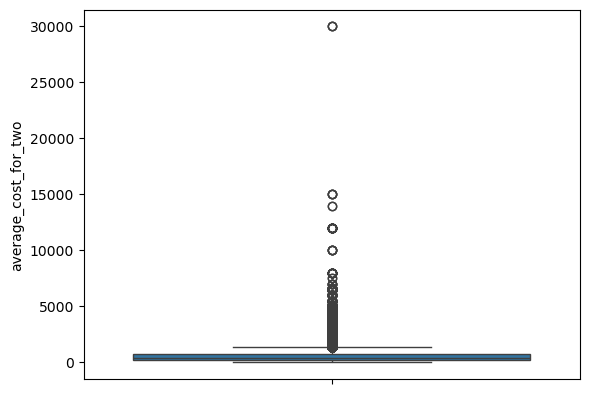

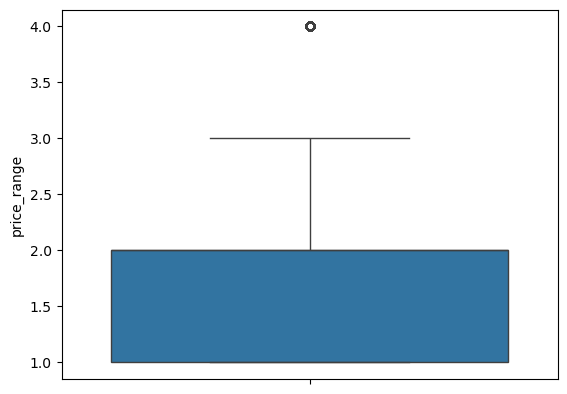

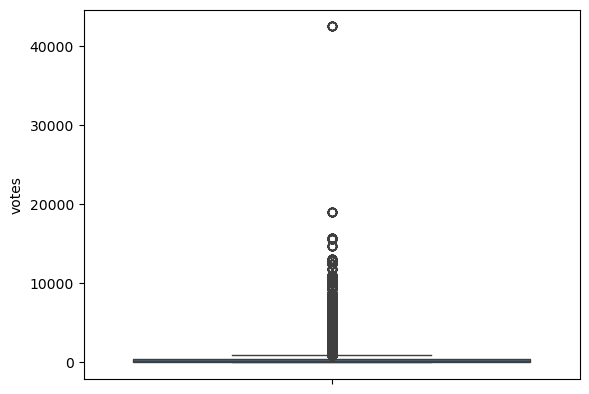

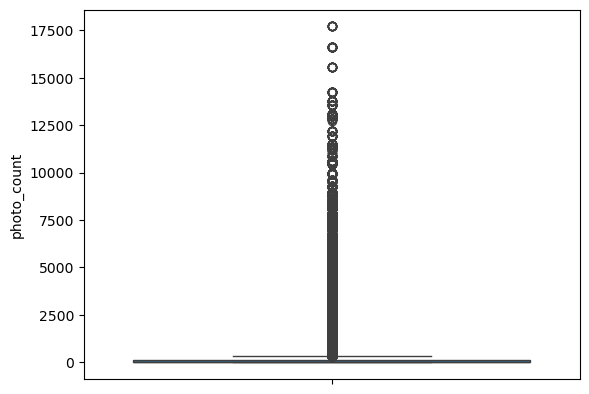

In [157]:
num_col1 = ["average_cost_for_two", "price_range", "votes", "photo_count"]
for i in num_col1:
    sns.boxplot(df[i])
    plt.show()

## Handling Outliers

In [159]:
## IQR
num_col1 = ["average_cost_for_two", "price_range", "votes", "photo_count"]
for i in num_col1:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    print(f"Q1:{q1}")
    print(f"Q3:{q3}")
    print(f"IQR:{iqr}")

## formulate UL and lower LL
    UL = q3+1.5*iqr
    LL = q1-1.5*iqr
    df[i] = np.where(df[i]>UL,UL,
                    np.where(df[i]<LL,LL,
                            df[i]))

Q1:250.0
Q3:700.0
IQR:450.0
Q1:1.0
Q3:2.0
IQR:1.0
Q1:16.0
Q3:362.0
IQR:346.0
Q1:3.0
Q3:128.0
IQR:125.0


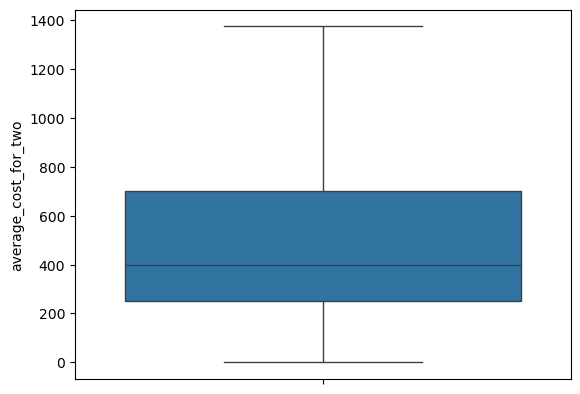

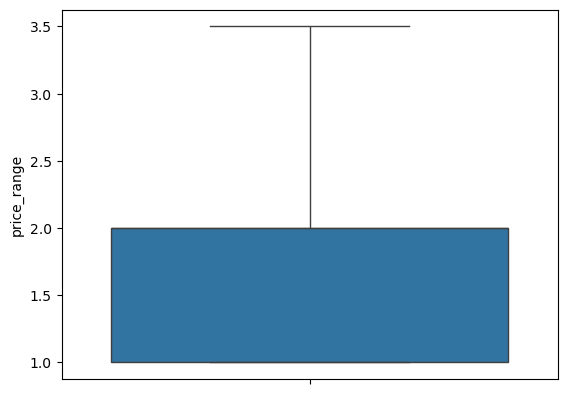

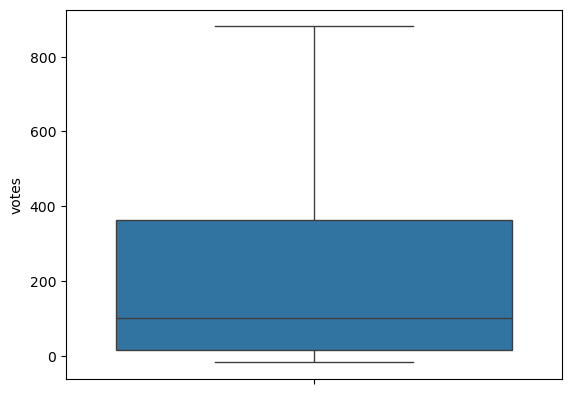

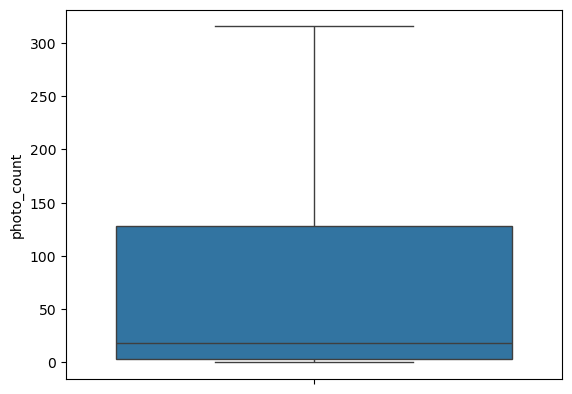

In [160]:
num_col1 = ["average_cost_for_two", "price_range", "votes", "photo_count"]
for i in num_col1:
    sns.boxplot(df[i])
    plt.show()

In [161]:
data_preprocessd = df.copy()
df.to_csv("data_preprocessd.csv")

## Basic Statistics:
 Calculate and visualize the average rating of restaurants.
 Analyze the distribution of restaurant ratings to understand the overall rating
 landscape.
 1. Statistical Analysis
 2. Univariate - analysis using single column/ feature in dataset
 3. Bivariate analysis -  analysis using two features/columns in dataset
 4. Mulitivariate analysis -  analysis using more than two features/columns in dataset

In [163]:
## summarize dataset
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,535.667332,1.852848,3.395937,239.495282,83.740210,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,378.328401,0.828051,1.283642,294.654997,115.748161,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,1375.000000,3.500000,4.900000,881.000000,315.500000,1.000000,-1.0


Average Rating given by customers: 3.3959366625146266


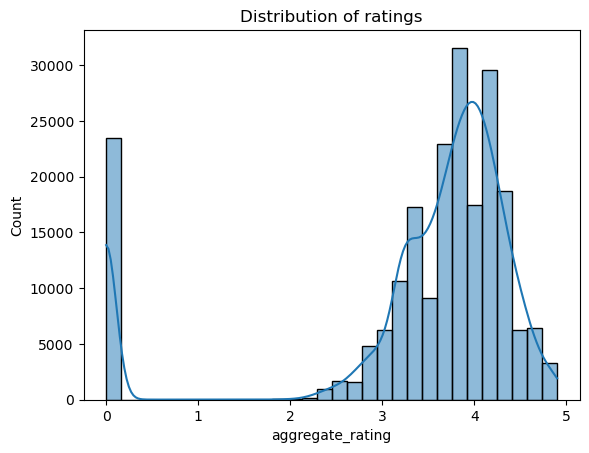

In [164]:
## Average rating
print("Average Rating given by customers:", df["aggregate_rating"].mean())
## plot the ratings
sns.histplot(df["aggregate_rating"], bins = 30, kde = True)
plt.title("Distribution of ratings")
plt.show()

## Location analysis
 1.  Identify the city with the highest concentration of restaurants.
 2. Visualize the distribution of restaurant ratings across different cities

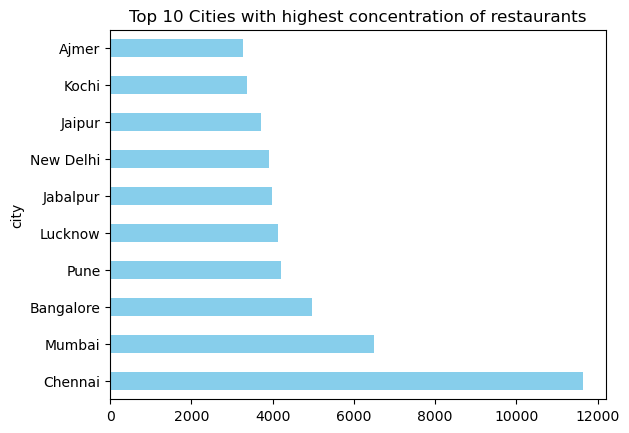

In [166]:
city_count= df["city"].value_counts().head(10)
city_count.plot(kind = "barh", color = "skyblue")
plt.title("Top 10 Cities with highest concentration of restaurants")
plt.show()

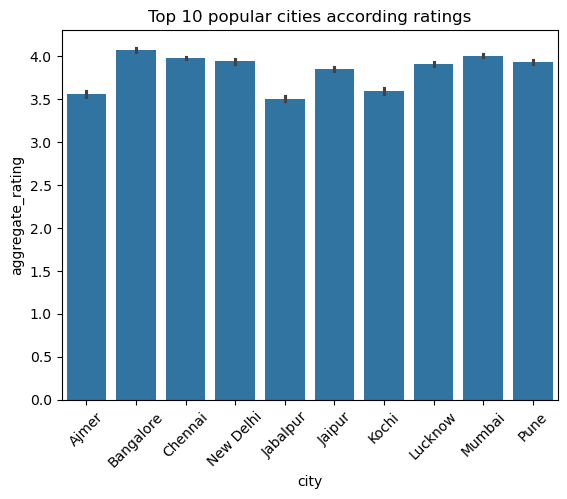

In [167]:
## Rating vs city
sns.barplot(x = "city", y = "aggregate_rating", data = df[df["city"].isin(city_count.index)])
plt.xticks(rotation = 45)
plt.title("Top 10 popular cities according ratings")
plt.show()

## Price Range and Rating:
1. Analyze the relationship between price range and restaurant ratings.
2. Visualize the average cost for two people in different price categories

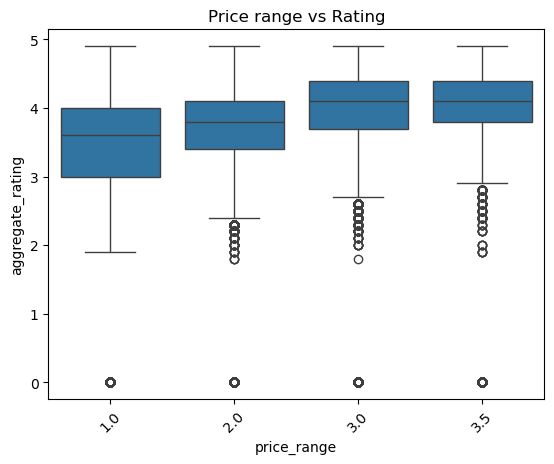

In [169]:
## Q1.
sns.boxplot(df, x = "price_range", y = "aggregate_rating")
plt.title("Price range vs Rating")
plt.xticks(rotation = 45)
plt.show()

In [170]:
## pie chart - when you have distribution based categories - 2 category
## scatter plot - both should numerical
## bar plot - one should be categorical and another should be numerical
## histplot - probability of distribution
# line chart - analysis with time, profit/loss, price- time

## Word Cloud for Reviews:
 1. Create a word cloud based on customer reviews to identify common positive
 and negative sentiments.
 2. Analyze frequently mentioned words and sentiments

In [172]:
df.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,700.0,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,600.0,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,881.0,161.0,-1,-1


In [173]:
# !pip install wordcloud

In [174]:
from wordcloud import WordCloud

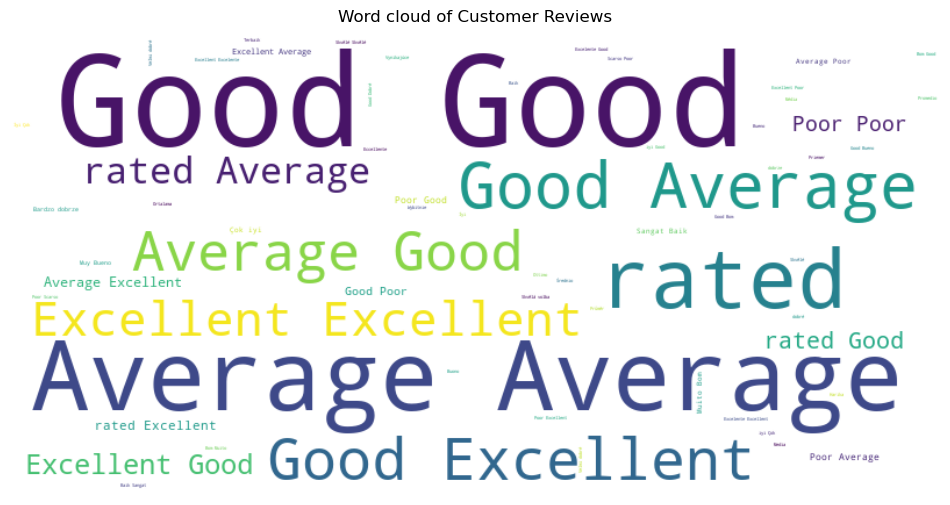

In [175]:
if "rating_text" in df.columns:
    review_txt = ' '.join(df["rating_text"].dropna().tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(review_txt)
    plt.figure(figsize = (12,8))
    plt.imshow(wordcloud, interpolation =  "bilinear")
    plt.axis("off")
    plt.title("Word cloud of Customer Reviews")
    plt.show()

## Restaurant Features:
1. Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol
 availability, etc.
2. Investigate if the presence of certain features correlates with higher ratings

In [178]:
df["highlights"].head()

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
Name: highlights, dtype: object

In [179]:
## Abstract syntax library - It segregates different literals for a common data type. Functions as eval but it has more
# strong bond with data type
import ast

df["highlights"] = df["highlights"].apply(ast.literal_eval)

## seaparte unique features for each list
all_feat = set([j for i in df["highlights"] for j in i])

## One hot encoding 
for i in all_feat:
    df[i] = df["highlights"].apply(lambda x: 1 if i in x else 0)



In [180]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude',
       ...
       'Vegan Options', 'Entry Fee', 'Resto Bar', 'Gastro Pub',
       'Celebrity Frequented', 'Disabled Friendly', 'Sodexo', 'City View',
       'Digital Payments Accepted', 'Luxury Dining'],
      dtype='object', length=127)

In [181]:
df["Wifi"].value_counts()

Wifi
0    192868
1     19076
Name: count, dtype: int64

In [182]:
## if restaurats have wifi
def plot(df, x):
    data = df.groupby(x)["aggregate_rating"].mean()
    sns.barplot(data)
    plt.title(f"{x} vs aggregate_rating")
    plt.show()

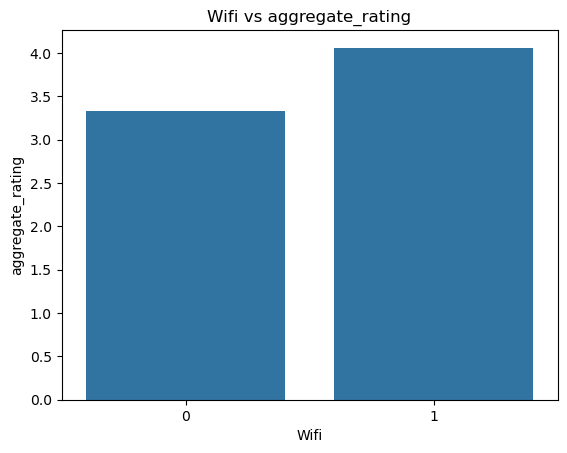

In [183]:
plot(df=df, x="Wifi")

<Axes: xlabel='No Alcohol Available', ylabel='aggregate_rating'>

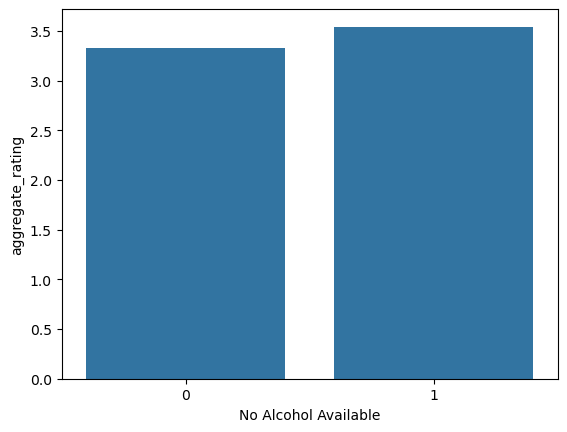

In [184]:
## No Alcohol Available	
no_alco_rating = df.groupby("No Alcohol Available")["aggregate_rating"].mean()
sns.barplot(no_alco_rating)

In [185]:
data_preprocessd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211944 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  country_id            211944 non-null  int64  
 11  locality_verbose      211944 non-null  object 
 12  cuisines              211944 non-null  object 
 13  timings               211944 non-null  object 
 14  average_cost_for_two  211944 non-null  float64
 15  

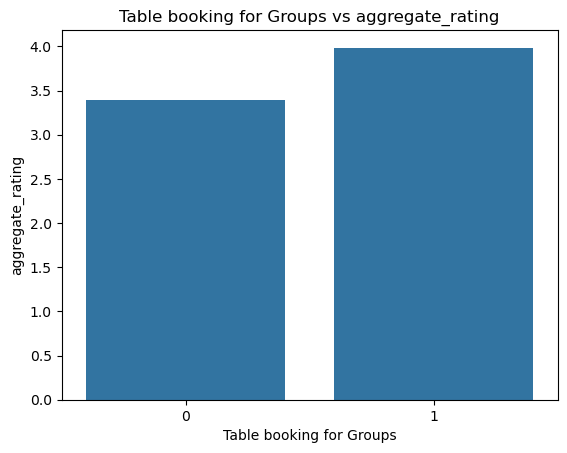

In [186]:
plot(df=df, x="Table booking for Groups")

In [187]:
num_col = data_preprocessd.select_dtypes(include = ["int","float64"])
num_col.head(2)

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
0,3400299,34,27.211450,78.002381,1,700.0,2.0,4.4,814.0,154.0,-1,-1
1,3400005,34,27.160569,78.011583,1,600.0,2.0,4.4,881.0,161.0,-1,-1


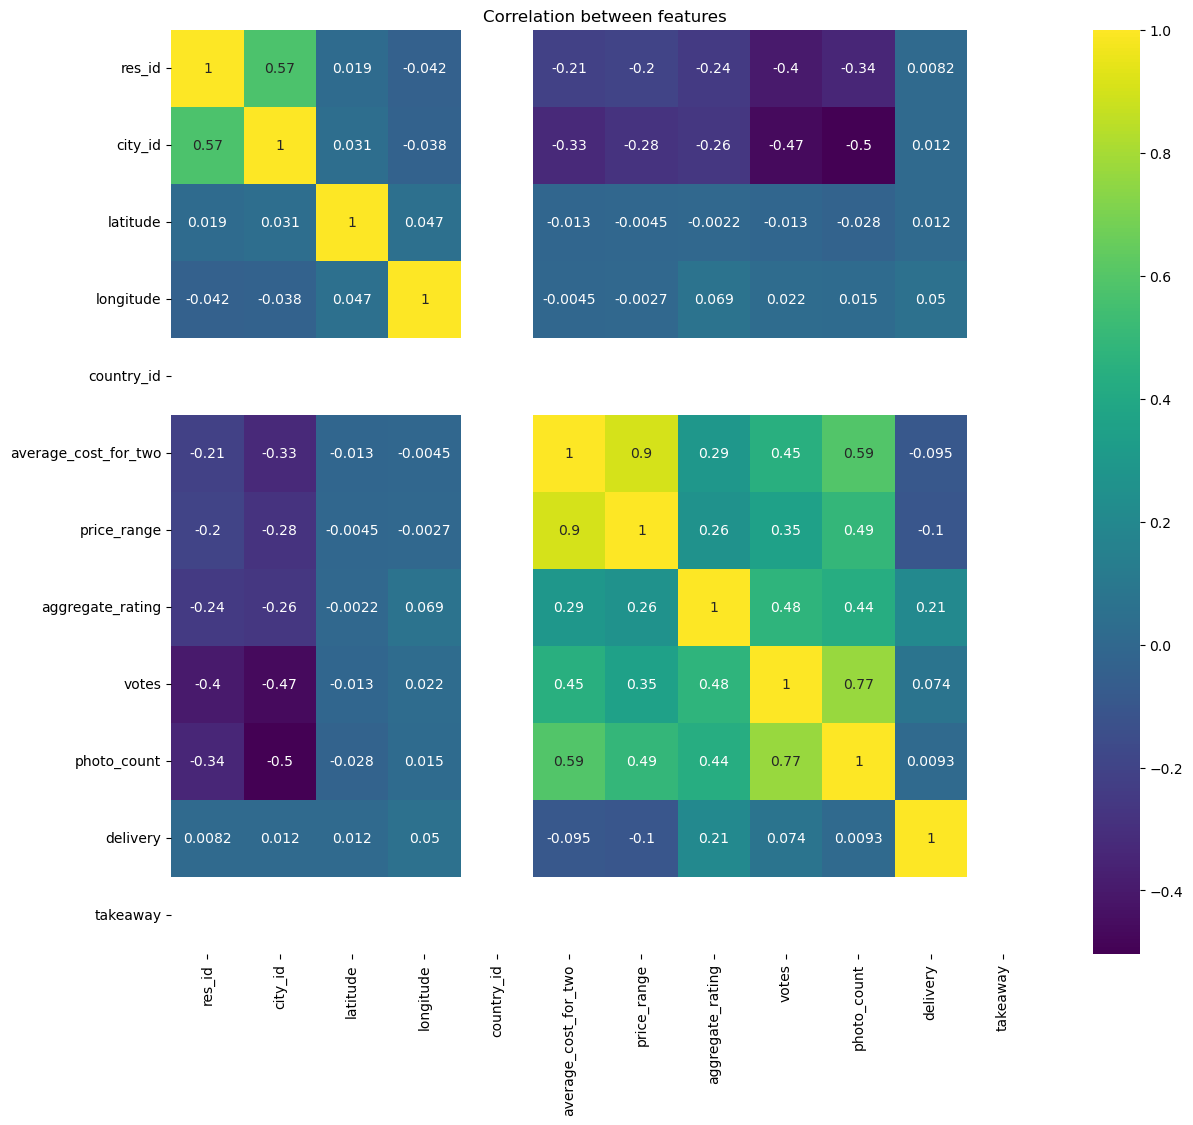

In [188]:
## Correlation - its multivariate analysis
plt.figure(figsize=(14,12))
sns.heatmap(num_col.corr(), annot = True, cmap = "viridis")
plt.title("Correlation between features")
plt.show()

In [189]:
new_data = pd.read_csv("data_preprocessd.csv")
new_data.head()

,Unnamed: 0,res_id,name,establishment,url,address,city,city_id,locality,latitude,...,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,...,700.0,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,-1,-1
1,1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,...,600.0,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,881.0,161.0,-1,-1
2,2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,...,300.0,1.0,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801.0,107.0,1,-1
3,3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,...,300.0,1.0,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693.0,157.0,1,-1
4,4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,...,1000.0,3.0,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470.0,291.0,1,-1


In [190]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            211944 non-null  int64  
 1   res_id                211944 non-null  int64  
 2   name                  211944 non-null  object 
 3   establishment         211944 non-null  object 
 4   url                   211944 non-null  object 
 5   address               211944 non-null  object 
 6   city                  211944 non-null  object 
 7   city_id               211944 non-null  int64  
 8   locality              211944 non-null  object 
 9   latitude              211944 non-null  float64
 10  longitude             211944 non-null  float64
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              211944 non-null  object 
 14  timings               211944 non-null  object 
 15  

 ## Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.

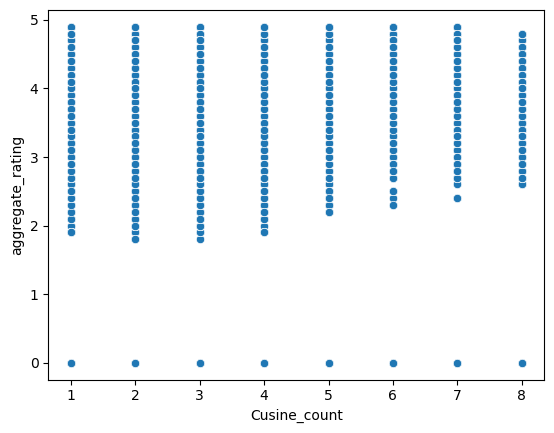

In [192]:
new_data["Cusine_count"] = new_data["cuisines"].apply(lambda x: len(str(x).split(","))) ## North Indian, Chinese, Continental, Healthy Food
sns.scatterplot(x = new_data["Cusine_count"], y = "aggregate_rating", data =new_data )
plt.show()


In [193]:
new_data["cuisines"].value_counts()

cuisines
North Indian                                            17387
Fast Food                                                6721
Cafe                                                     6190
North Indian, Chinese                                    5820
South Indian                                             5217
                                                        ...  
North Indian, Chinese, Continental, Healthy Food            1
Mughlai, North Indian, Chinese, Continental, Italian        1
Burger, Rolls, Fast Food                                    1
Fast Food, Chinese, Burger                                  1
North Indian, Lucknowi, Chinese                             1
Name: count, Length: 9382, dtype: int64

In [194]:
new_data["Cusine_count"]

0         5
1         6
2         2
3         4
4         3
         ..
211939    1
211940    1
211941    3
211942    3
211943    3
Name: Cusine_count, Length: 211944, dtype: int64

In [195]:
new_data.head(2)

,Unnamed: 0,res_id,name,establishment,url,address,city,city_id,locality,latitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,Cusine_count
0,0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,...,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,-1,-1,5
1,1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,...,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,881.0,161.0,-1,-1,6


## Feature Scaling - Coverting Categorical variables into numerical variables